In [1]:
from jax import numpy as jnp
import numpy as np

from jax import random as rand
from jax import nn

from rockpool.devices.dynapse.config.weights import WeightParameters
from rockpool.nn.modules.native.linear import kaiming

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

Could not import package: No module named 'iaf_nest'


In [2]:
rec_shape = (3,5,4)
w_rec = abs(kaiming(rec_shape))

In [3]:
wc = WeightParameters(w_rec)

In [4]:
loss_t = wc.fit_update(100000)

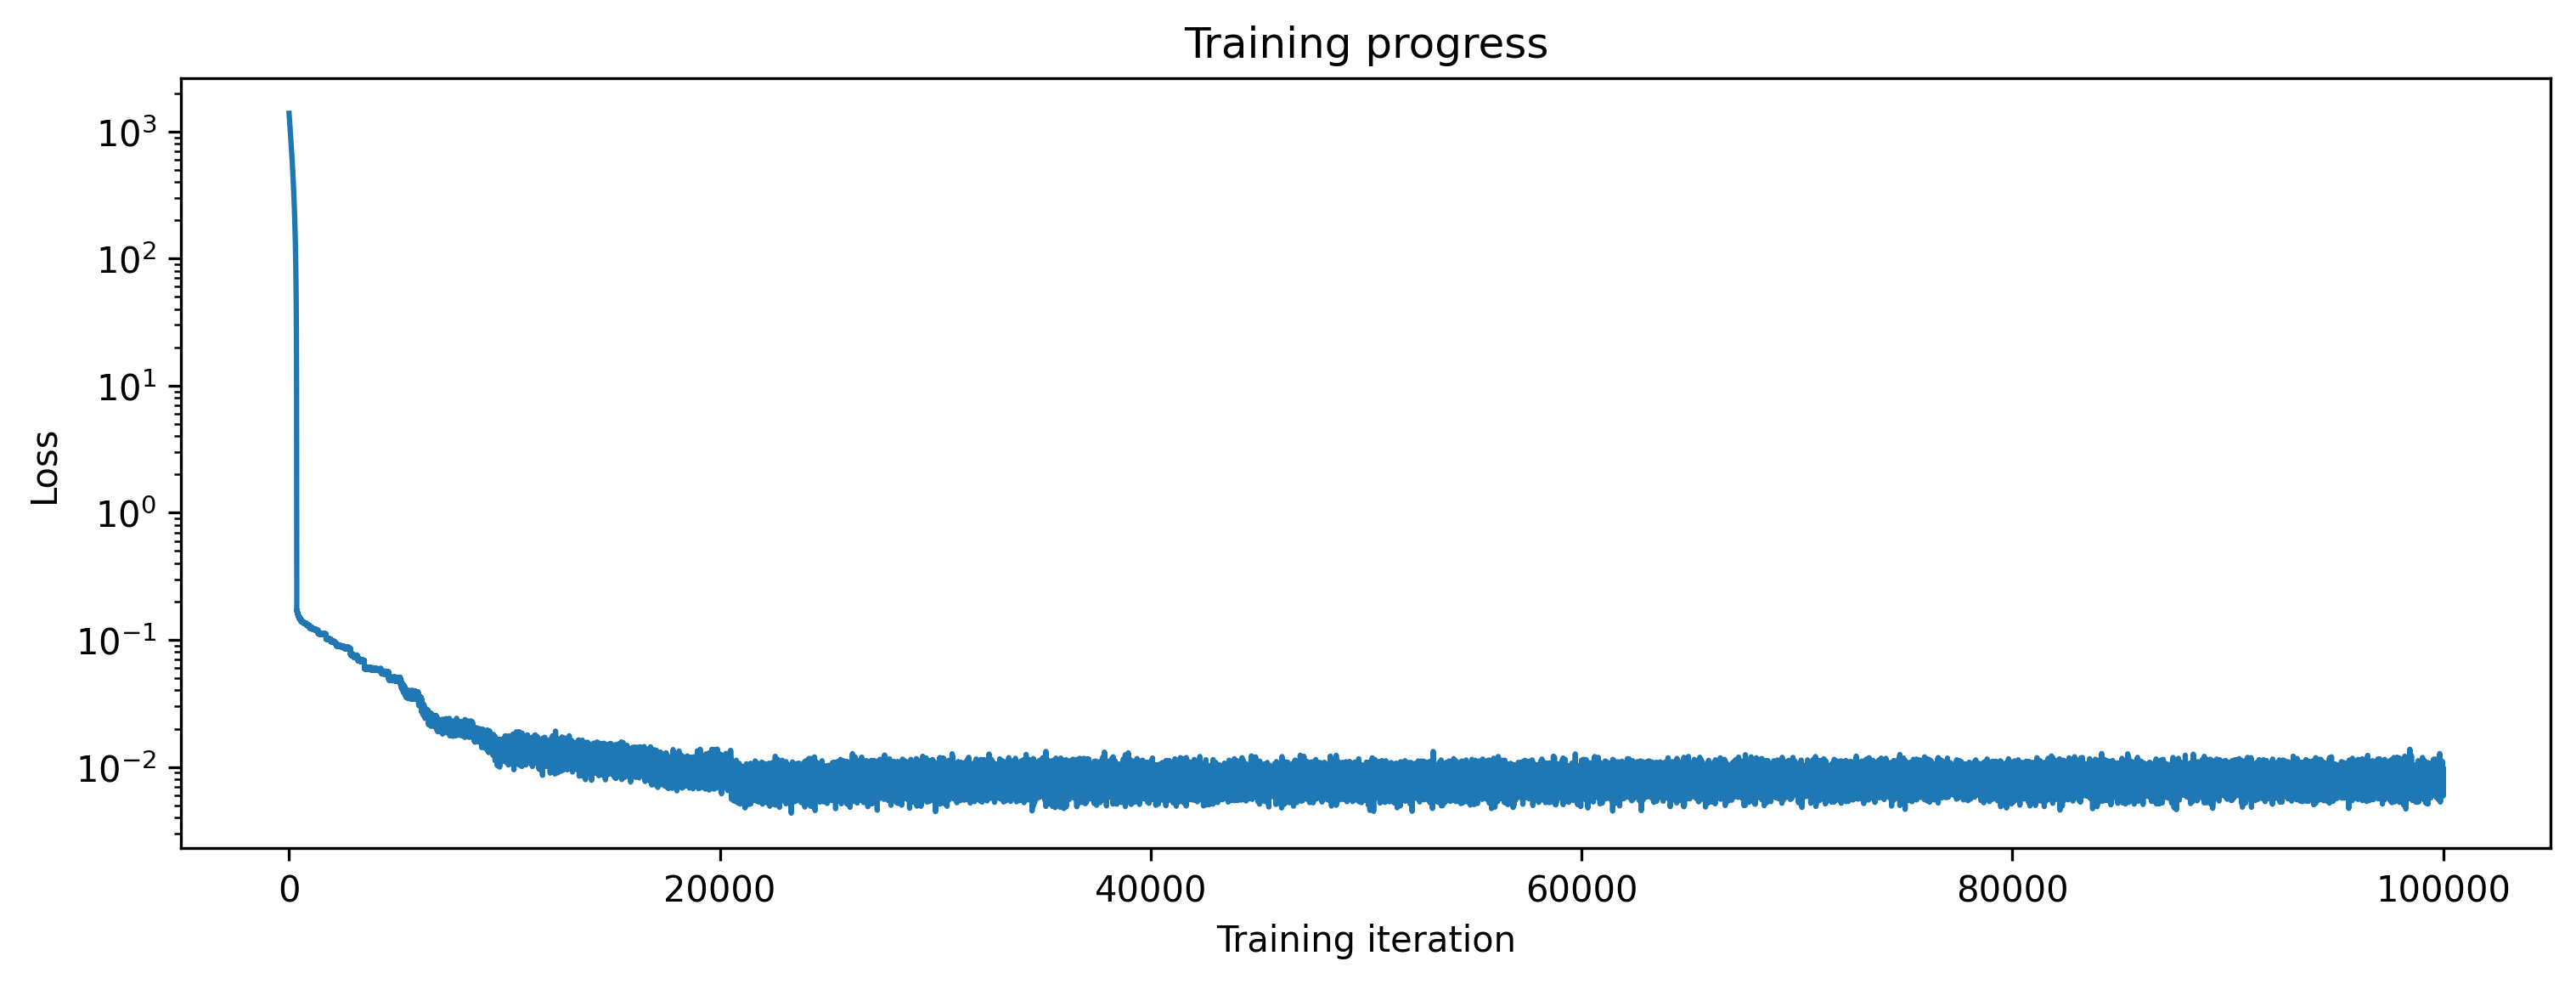

In [5]:
plt.figure()
plt.plot(loss_t)
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Training iteration');
plt.title('Training progress');

In [6]:
import rockpool.training.jax_loss as l
l.mse(wc.w_flat, wc.ae(wc.w_flat)[0])

DeviceArray(0.0043247, dtype=float32)

In [7]:
wc.weight_matrix()

DeviceArray([[[0.73638695, 0.3513099 , 0.3513099 , 0.19661255],
              [0.38507706, 0.5662924 , 0.37782788, 0.36670715],
              [0.37782788, 0.1884645 , 0.55517167, 0.73638695],
              [0.73638695, 0.        , 0.73638695, 0.55517167],
              [0.5397744 , 0.54792243, 0.5662924 , 0.        ]],

             [[0.54792243, 0.54792243, 0.19661255, 0.5662924 ],
              [0.73638695, 0.38507706, 0.        , 0.18121532],
              [0.54792243, 0.55517167, 0.35855907, 0.73638695],
              [0.5662924 , 0.1884645 , 0.1884645 , 0.1884645 ],
              [0.37782788, 0.1700946 , 0.3696798 , 0.73638695]],

             [[0.18121532, 0.73638695, 0.18121532, 0.1700946 ],
              [0.1700946 , 0.54792243, 0.19661255, 0.        ],
              [0.18121532, 0.1884645 , 0.54792243, 0.1884645 ],
              [0.54792243, 0.5662924 , 0.37782788, 0.1884645 ],
              [0.5662924 , 0.5662924 , 0.73638695, 0.1884645 ]]],            dtype=float32)

In [8]:
wc.weights

array([[[0.70790419, 0.34633095, 0.29518298, 0.16593537],
        [0.39278162, 0.60660818, 0.373477  , 0.37668299],
        [0.29928213, 0.28493836, 0.60829529, 0.79442146],
        [0.77111231, 0.02892713, 0.71279355, 0.54293961],
        [0.61473255, 0.47984299, 0.482948  , 0.04341482]],

       [[0.61313332, 0.52350545, 0.17820334, 0.65093317],
        [0.80700163, 0.36853399, 0.0809923 , 0.27189558],
        [0.59731819, 0.43930357, 0.30342952, 0.76074541],
        [0.58258982, 0.1268593 , 0.2576657 , 0.10658505],
        [0.4166796 , 0.20149433, 0.39576874, 0.76898071]],

       [[0.19664825, 0.79596609, 0.13386417, 0.17917663],
        [0.21661927, 0.57789009, 0.17592676, 0.00526478],
        [0.23535563, 0.25754983, 0.48445264, 0.22297344],
        [0.64068233, 0.50651581, 0.33625073, 0.14275861],
        [0.54009294, 0.60006053, 0.69140315, 0.2382186 ]]])

In [9]:
wc.mse

DeviceArray(0.00277984, dtype=float32)

In [10]:
np.min(loss_t) / (wc.scale)**2

DeviceArray(0.00277984, dtype=float32)

In [11]:
wc.Iw

DeviceArray([0.1700946 , 0.19661255, 0.18121532, 0.1884645 ], dtype=float32)

In [12]:
bitmask = np.array(
    [
        [
            [14, 4, 3, 7],
            [7, 2, 7, 2],
            [10, 14, 8, 13],
            [10, 9, 1, 8],
            [4, 15, 11, 7],
        ],
        [
            [9, 11, 10, 13],
            [12, 7, 6, 11],
            [4, 6, 2, 11],
            [10, 5, 13, 4],
            [7, 3, 10, 3],
        ],
        [
            [10, 1, 1, 12],
            [14, 15, 0, 5],
            [14, 11, 9, 0],
            [12, 10, 10, 9],
            [4, 14, 9, 3],
        ],
    ]
)
wc_custom = WeightParameters(None, 1e-6, 2e-6, 4e-6, 8e-6, jnp.array(bitmask))

In [13]:
wc_custom.weight_matrix()

DeviceArray([[[1.3999999e-05, 4.0000000e-06, 3.0000001e-06,
               6.9999996e-06],
              [6.9999996e-06, 2.0000000e-06, 6.9999996e-06,
               2.0000000e-06],
              [9.9999997e-06, 1.3999999e-05, 8.0000000e-06,
               1.3000000e-05],
              [9.9999997e-06, 9.0000003e-06, 1.0000000e-06,
               8.0000000e-06],
              [4.0000000e-06, 1.5000000e-05, 1.1000000e-05,
               6.9999996e-06]],

             [[9.0000003e-06, 1.1000000e-05, 9.9999997e-06,
               1.3000000e-05],
              [1.2000000e-05, 6.9999996e-06, 6.0000002e-06,
               1.1000000e-05],
              [4.0000000e-06, 6.0000002e-06, 2.0000000e-06,
               1.1000000e-05],
              [9.9999997e-06, 4.9999999e-06, 1.3000000e-05,
               4.0000000e-06],
              [6.9999996e-06, 3.0000001e-06, 9.9999997e-06,
               3.0000001e-06]],

             [[9.9999997e-06, 1.0000000e-06, 1.0000000e-06,
               1.2000000e-

In [14]:
wc_custom.mse

DeviceArray(0., dtype=float32)

In [15]:
encoder, state, rec = wc_custom.fit(n_epoch=100000, optimizer="adam", step_size=lambda i: (1e-4 / (1. + 1e-4*i)))

0.010243694


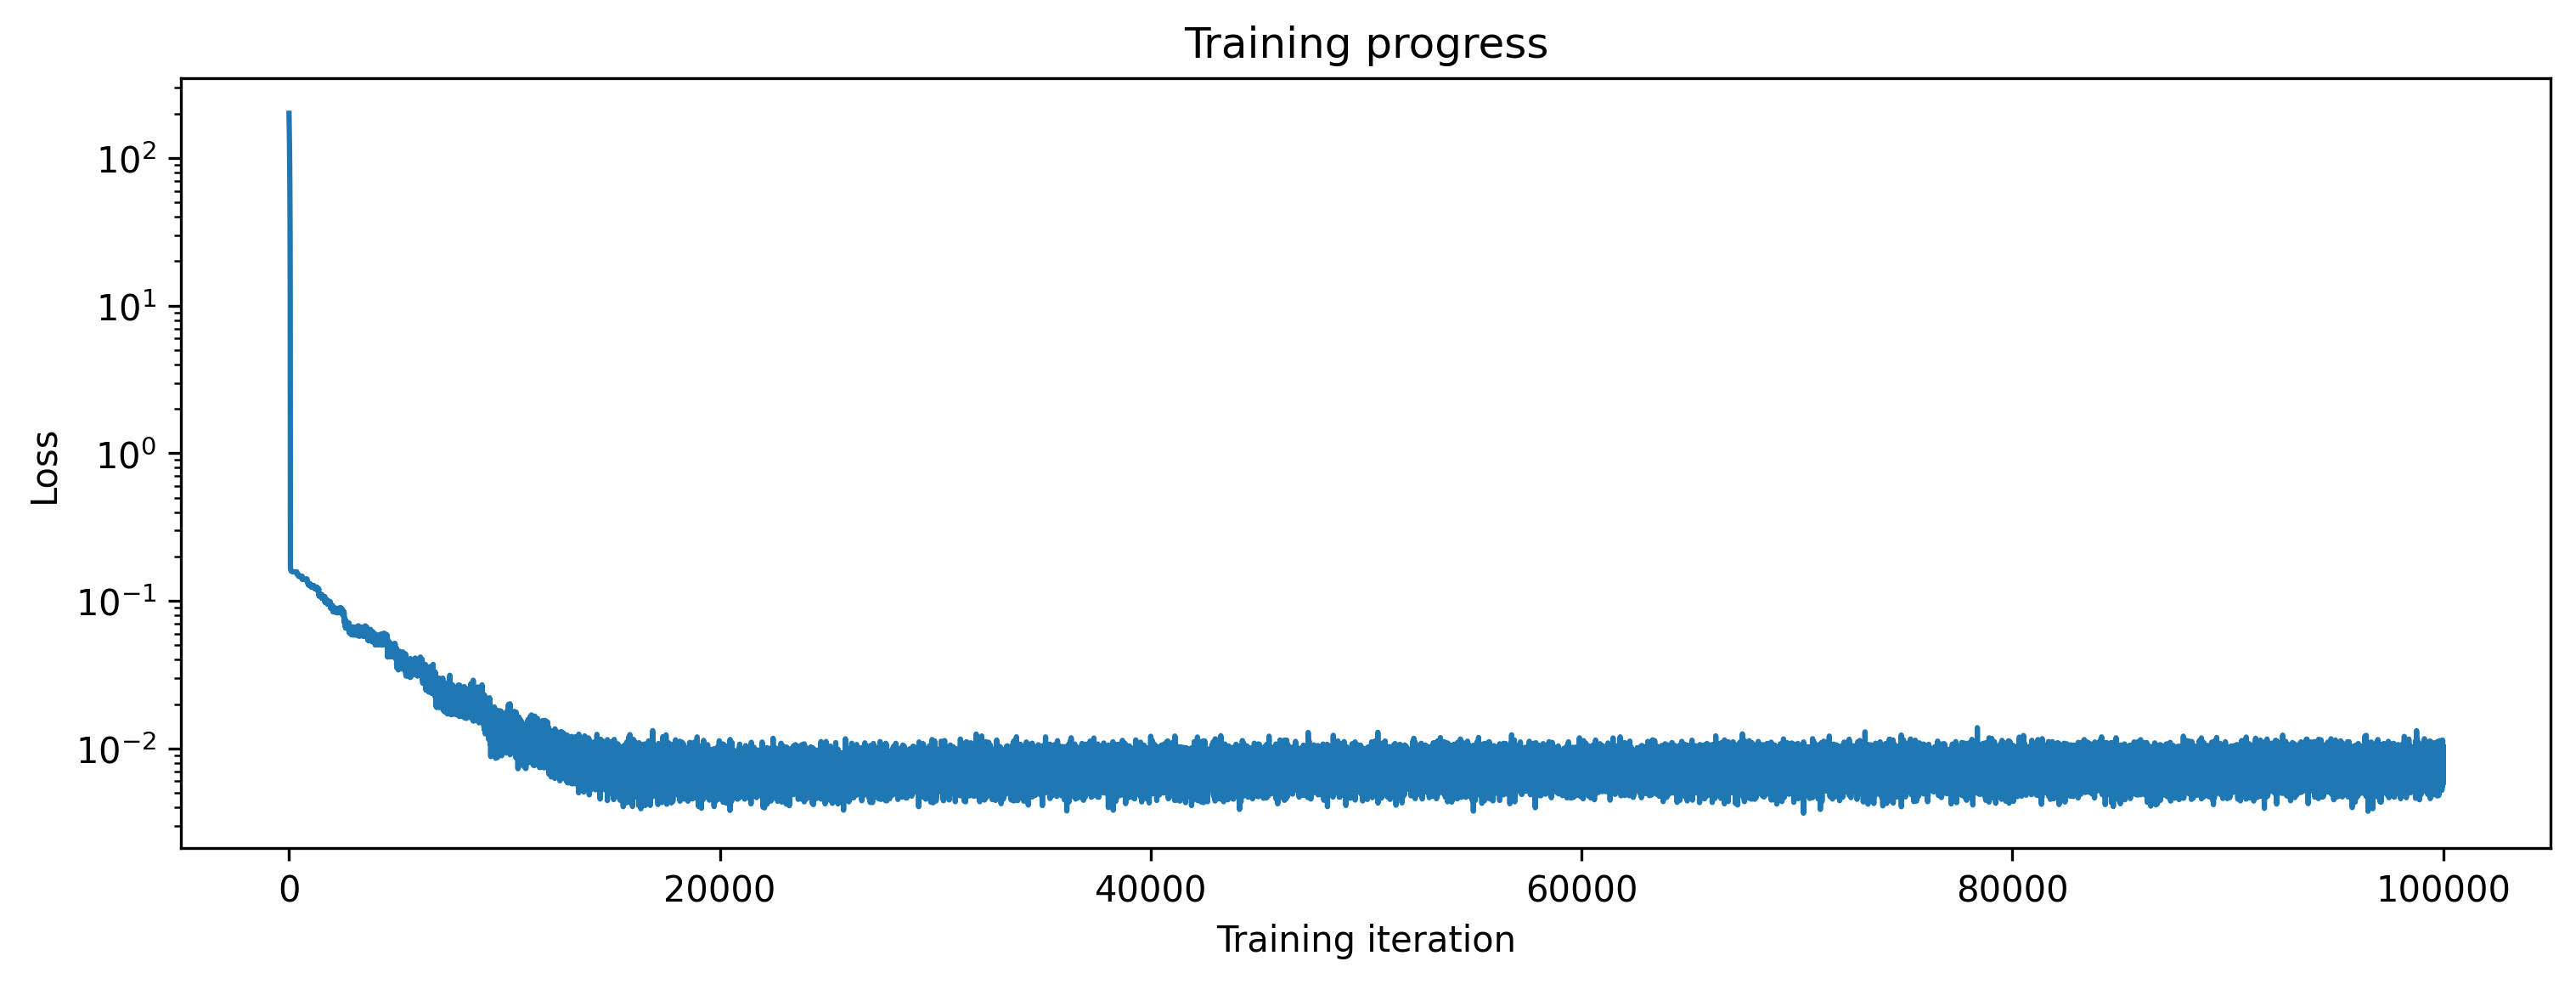

In [16]:
plt.figure()
plt.plot(rec["loss"])
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Training iteration');
plt.title('Training progress');
print(rec["loss"][-1])

In [17]:
encoder.code(wc_custom.w_flat) / wc_custom.transforms["scale"]

DeviceArray([3.4682396e-06, 2.6068496e-06, 3.8261956e-06, 3.4659265e-06],            dtype=float32)

In [18]:
wc_custom.w_flat

DeviceArray([0.93333334, 0.26666668, 0.20000002, 0.46666667, 0.46666667,
             0.13333334, 0.46666667, 0.13333334, 0.6666667 , 0.93333334,
             0.53333336, 0.86666673, 0.6666667 , 0.6000001 , 0.06666667,
             0.53333336, 0.26666668, 1.        , 0.7333334 , 0.46666667,
             0.6000001 , 0.7333334 , 0.6666667 , 0.86666673, 0.8000001 ,
             0.46666667, 0.40000004, 0.7333334 , 0.26666668, 0.40000004,
             0.13333334, 0.7333334 , 0.6666667 , 0.33333334, 0.86666673,
             0.26666668, 0.46666667, 0.20000002, 0.6666667 , 0.20000002,
             0.6666667 , 0.06666667, 0.06666667, 0.8000001 , 0.93333334,
             1.        , 0.33333334, 0.93333334, 0.7333334 , 0.6000001 ,
             0.8000001 , 0.6666667 , 0.6666667 , 0.6000001 , 0.26666668,
             0.93333334, 0.6000001 , 0.20000002], dtype=float32)

In [19]:
encoder(wc_custom.w_flat)[0]

DeviceArray([0.8911475 , 0.17379   , 0.17379   , 0.405006  , 0.42886972,
             0.23106179, 0.4048518 , 0.17379   , 0.6600857 , 0.8911475 ,
             0.405006  , 0.8911475 , 0.65993154, 0.6600857 , 0.        ,
             0.4862957 , 0.25507972, 0.8911475 , 0.6600857 , 0.4862957 ,
             0.65993154, 0.65993154, 0.7173575 , 0.8911475 , 0.8911475 ,
             0.405006  , 0.42886972, 0.6600857 , 0.23106179, 0.4862957 ,
             0.17379   , 0.6600857 , 0.65993154, 0.25507972, 0.8911475 ,
             0.17379   , 0.46227777, 0.23121598, 0.7173575 , 0.23121598,
             0.6600857 , 0.        , 0.        , 0.8911475 , 0.8911475 ,
             0.8911475 , 0.405006  , 0.8911475 , 0.63606775, 0.65993154,
             0.8911475 , 0.7173575 , 0.65993154, 0.63606775, 0.25507972,
             0.8911475 , 0.63606775, 0.23106179], dtype=float32)

In [22]:
wc_custom.ae.w_en_1

DeviceArray([ 0.06186451, -0.14878154,  0.11003371,  0.02487398,
              0.0722767 , -0.08270794,  0.166025  ,  0.03246573,
              0.10950124,  0.1769702 ,  0.08745073, -0.1722062 ,
             -0.15386522,  0.04598323, -0.1756338 ,  0.10385055,
              0.15218654, -0.13909754, -0.15860769,  0.17522308,
              0.10682195, -0.16140307, -0.05527176,  0.08795156,
              0.08311768,  0.18057565, -0.07383315,  0.06692164,
             -0.14897695, -0.11823726,  0.14315201,  0.0756626 ,
             -0.146737  , -0.07408491, -0.00667737, -0.16076876,
              0.03719821, -0.0764175 ,  0.03113181,  0.09268361,
             -0.12306584,  0.06957475, -0.07197509, -0.06687804,
             -0.16003262, -0.01325195,  0.00440122, -0.06815214,
             -0.15265572,  0.05475333,  0.18211122,  0.00277838,
             -0.06456813, -0.0868836 ,  0.06389823, -0.02026871,
              0.1597696 , -0.15161027], dtype=float32)

In [25]:
wc_custom.ae.parameters().keys()

dict_keys(['w_en_0', 'w_en_1', 'w_en_2', 'w_en_3', 'w_dec'])